In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/internship_datasets/Crop Production data.csv")

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [ ]:
df.shape

(246091, 7)

In [ ]:
df.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [ ]:
df['Production'].isna().sum()

3730

In [ ]:
Frames=[]
for i in list (set(df['District_Name'])):
  df_district=df[df['District_Name']==i]
  df_district['Production'].fillna(df_district['Production'].mean(),inplace=True)
  Frames.append(df_district)
  final_df= pd.concat(Frames)

<ipython-input-10-8ec02c73433a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district['Production'].fillna(df_district['Production'].mean(),inplace=True)


In [ ]:
final_df.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production       False
dtype: bool

In [ ]:
final_df.duplicated(subset=None,keep='first').any()

False

# **Checking for correlation between variables**

<Axes: >

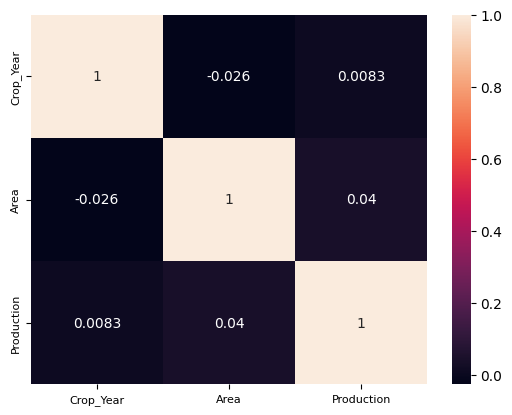

In [ ]:
# Drop non-numeric columns before calculating correlation
numeric_df = final_df.select_dtypes(include=['number'])
plt.tick_params(labelsize=8)
sns.heatmap(numeric_df.corr(),annot=True)

**Result** : There is no high relationship between any variables

# **Univariate Analysis**

# State Name variable

In [ ]:
print(final_df['State_Name'].nunique())
print(final_df['State_Name'].unique())

33
['Meghalaya' 'Jharkhand' 'Maharashtra' 'Jammu and Kashmir ' 'Karnataka'
 'Tamil Nadu' 'Gujarat' 'Manipur' 'Chhattisgarh' 'Haryana' 'Punjab'
 'Rajasthan' 'Uttar Pradesh' 'Puducherry' 'Chandigarh' 'Odisha'
 'West Bengal' 'Bihar' 'Himachal Pradesh' 'Mizoram' 'Telangana ' 'Assam'
 'Madhya Pradesh' 'Nagaland' 'Arunachal Pradesh' 'Kerala' 'Goa' 'Tripura'
 'Sikkim' 'Uttarakhand' 'Andaman and Nicobar Islands' 'Andhra Pradesh'
 'Dadra and Nagar Haveli']


In [ ]:
final_df['State_Name'].value_counts()

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

**Result**: We have totally 33 unique states and we have more data from the top rich agriculture states like Uttar pradhesh , Madhya Pradesh and Karnataka

# District Name variable

In [ ]:
print(final_df['District_Name'].nunique())
print(final_df['District_Name'].unique())

646
['NORTH GARO HILLS' 'LATEHAR' 'NANDURBAR' 'BADGAM' 'CHIKBALLAPUR'
 'KANNIYAKUMARI' 'RAMGARH' 'SURAT' 'THOUBAL' 'EAST KHASI HILLS'
 'MAHASAMUND' 'FARIDABAD' 'BEED' 'BARNALA' 'KHUNTI' 'CHURU' 'ETAH' 'MAHE'
 'CHANDIGARH' 'GANJAM' 'KODERMA' 'MEDINIPUR WEST' 'BHOJPUR' 'KISHANGANJ'
 'KARUR' 'BILASPUR' 'PULWAMA' 'NAMAKKAL' 'BARAMULLA' 'AMRAVATI' 'LUNGLEI'
 'MOGA' 'JAMUI' 'LEH LADAKH' 'KHAMMAM' 'HISAR' 'PATHANKOT' 'KODAGU'
 'RAICHUR' 'WEST GARO HILLS' 'SITAPUR' 'DHEMAJI' 'CHHINDWARA' 'KATHUA'
 'BASTI' 'MON' 'WEST SIANG' 'PEREN' 'PORBANDAR' 'ERNAKULAM' 'GHAZIPUR'
 'DINAJPUR DAKSHIN' 'GUNA' 'BIKANER' 'RAIGARH' 'MAHBUBNAGAR' 'JASHPUR'
 'THIRUVALLUR' 'MADHEPURA' 'BEGUSARAI' 'RAMANAGARA' 'SOUTH GOA' 'SRINAGAR'
 'NAGAON' 'SOUTH TRIPURA' 'SITAMARHI' 'BEMETARA' 'DUMKA' 'JAMNAGAR'
 'FATEHPUR' 'OSMANABAD' 'KOLASIB' 'BALANGIR' 'NUAPADA' 'THANJAVUR'
 'SHIMOGA' 'KULGAM' 'JALANDHAR' 'BAHRAICH' 'MAMIT' 'FAIZABAD' 'BARWANI'
 'EAST DISTRICT' 'CACHAR' 'KARGIL' 'HASSAN' 'MUZAFFARNAGAR' 'MAYURBHANJ'
 'SHRAVAS

In [ ]:
final_df['District_Name'].value_counts()

District_Name
BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
MUMBAI         1
NAMSAI         1
Name: count, Length: 646, dtype: int64

**Result** : On district front we have more data coming from Bijapur , Tumkur followed by Belgaum , Hassan and Bellary

# Crop year variable

In [ ]:
print(final_df['Crop_Year'].nunique())
print(final_df['Crop_Year'].max())
print(final_df['Crop_Year'].min())

19
2015
1997


In [ ]:
final_df.Crop_Year.value_counts()

Crop_Year
2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: count, dtype: int64

**Result** : Data consists for India crop production from 1997 to 2015 , more vital data from 2003 and 2002.

# Season variable

In [ ]:
final_df['Season'].nunique()

6

In [ ]:
final_df['Season'].max()

'Winter     '

In [ ]:
final_df['Season'].value_counts()

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64

**Result** : More crops has been yeilded on winter season but more data points from Kharif followed by Rabi and whole year season

# Crop variable

In [ ]:
print(final_df['Crop'].nunique())
print(final_df.Crop.value_counts().head(10))

124
Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: count, dtype: int64


In [ ]:
final_df['Crop'].max()

'other oilseeds'

In [ ]:
final_df['Crop'].unique()

array(['Arhar/Tur', 'Banana', 'Castor seed', 'Cotton(lint)', 'Dry ginger',
       'Jute', 'Mesta', 'Sesamum', 'Soyabean', 'Sweet potato', 'Tapioca',
       'Cowpea(Lobia)', 'Gram', 'Masoor', 'Peas & beans (Pulses)',
       'Rapeseed &Mustard', 'Small millets', 'Tobacco', 'Wheat',
       'Arecanut', 'Black pepper', 'Cashewnut', 'Dry chillies', 'Maize',
       'Potato', 'Sugarcane', 'Turmeric', 'Rice', 'Ragi', 'Onion',
       'Groundnut', 'Moong(Green Gram)', 'Niger seed',
       'Other Kharif pulses', 'Sunflower', 'Urad', 'Other  Rabi pulses',
       'Safflower', 'Bajra', 'Jowar', 'other oilseeds', 'Tomato',
       'Other Cereals & Millets', 'Cond-spcs other', 'Linseed', 'Garlic',
       'Moth', 'Other Fresh Fruits', 'Other Vegetables', 'Horse-gram',
       'Coconut ', 'Coriander', 'Cardamom', 'Pulses total',
       'Total foodgrain', 'Bhindi', 'Bitter Gourd', 'Brinjal',
       'Citrus Fruit', 'Cucumber', 'Drum Stick', 'Jack Fruit', 'Mango',
       'Orange', 'Other Citrus Fruit', 'Papay

**Result** : 124 Unique crops available

In [ ]:
final_df.Production.describe()

count    2.460910e+05
mean     6.069226e+05
std      1.696894e+07
min      0.000000e+00
25%      9.100000e+01
50%      7.880000e+02
75%      7.870000e+03
max      1.250800e+09
Name: Production, dtype: float64

**Result**: Production value ranges from 0 to 1250800

{'whiskers': [<matplotlib.lines.Line2D at 0x7b3cf11897b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b3cf1188e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b3cf118bd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7b3cf0ff3550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b3cf0ff0820>],
 'means': []}

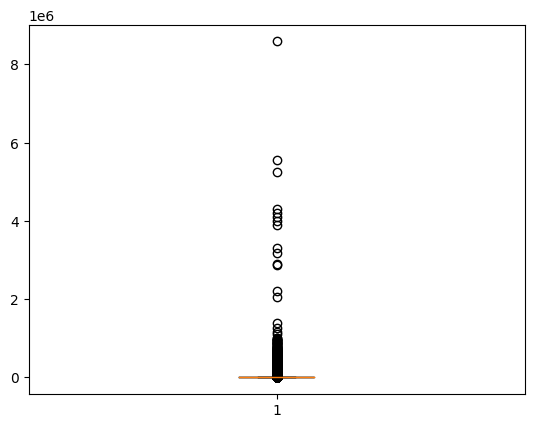

In [ ]:
plt.boxplot(final_df.Area)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b3cf1014d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7b3cf1015480>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b3cf1017e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7b3cf1015d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b3cf1017d60>],
 'means': []}

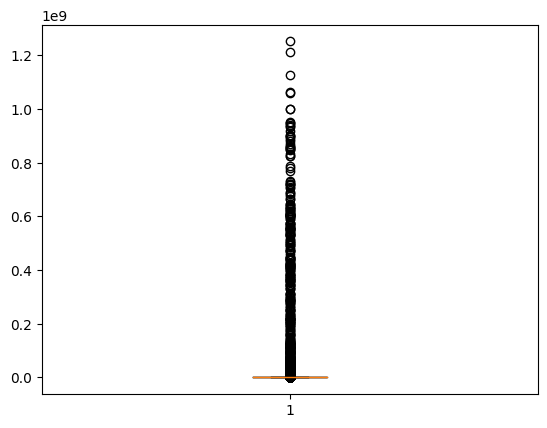

In [ ]:
plt.boxplot(final_df.Production)

**Result**: The area under cultivation and production is highly skewed and has many outliers

# **Bivariate Analysis**

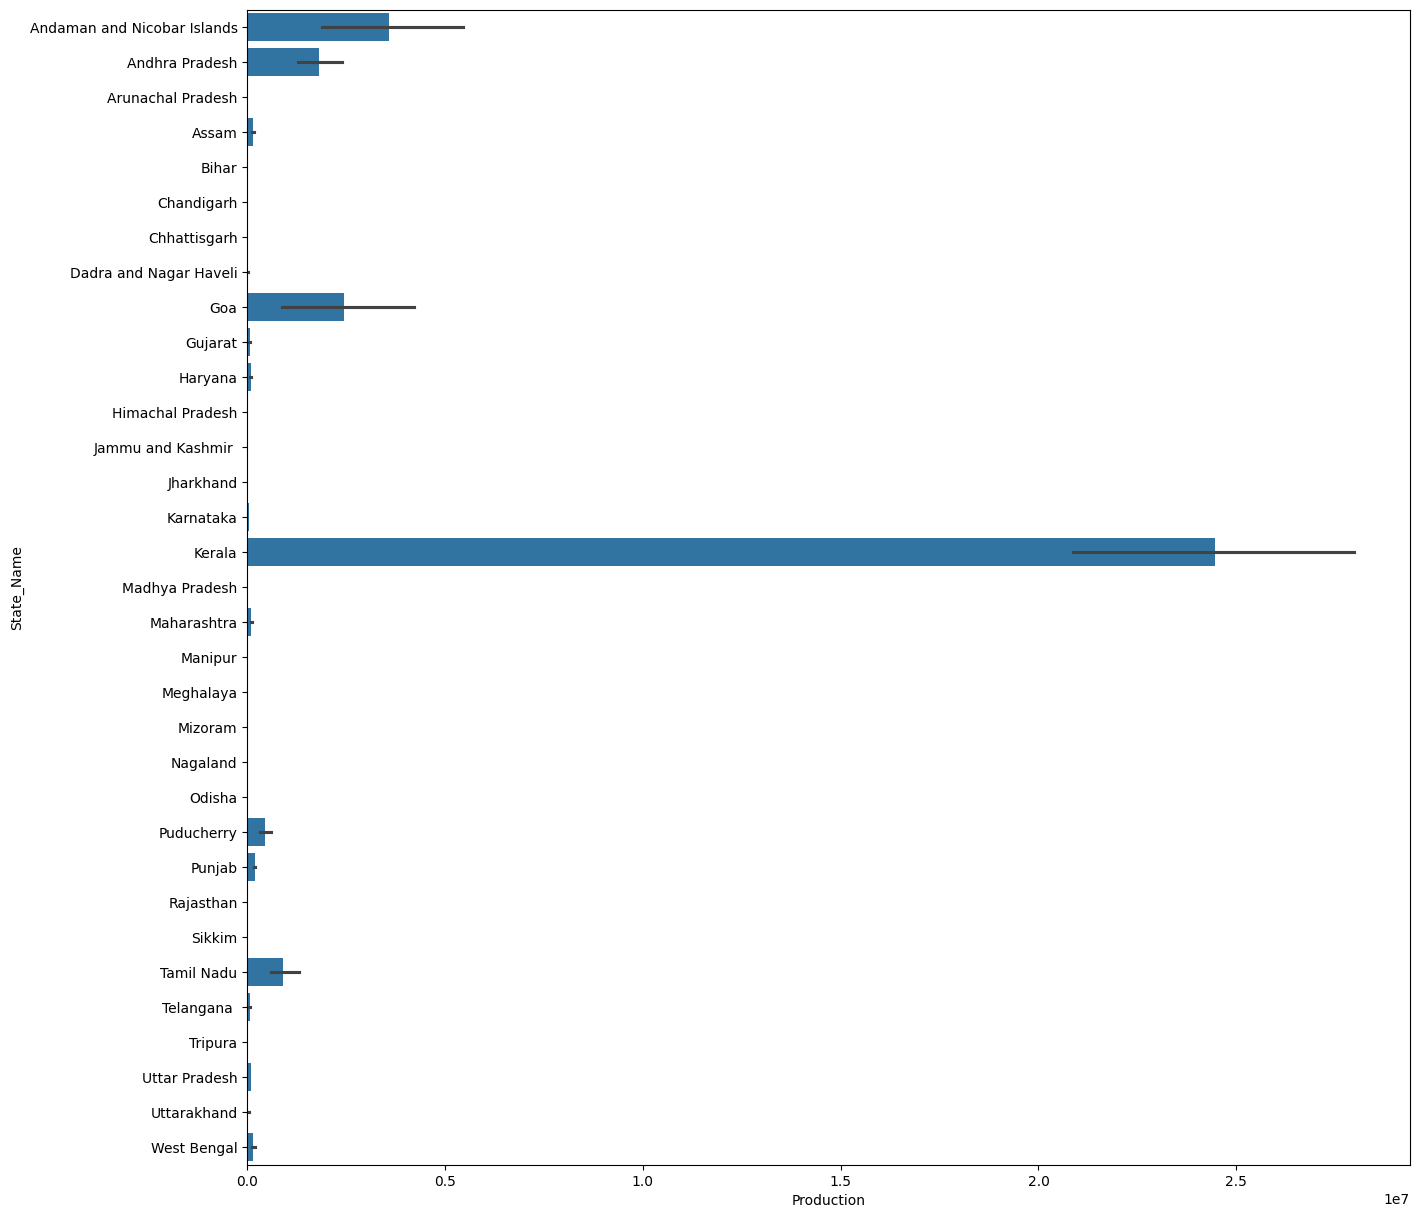

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x=df['Production'],y= df["State_Name"], orient='h');

**Result** : Kerala has yeilded the highest production

# **New variables**

In [ ]:
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [ ]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

final_df['Zones'] = final_df.apply(get_zonal_names, axis=1)
final_df['Zones'].unique()

array(['NE Zone', 'East Zone', 'West Zone', 'North Zone', 'South Zone',
       'Central Zone', 'Union Terr'], dtype=object)

In [ ]:
final_df['Zones'].value_counts()

Zones
South Zone      54207
North Zone      51468
East Zone       43339
West Zone       33786
Central Zone    33652
NE Zone         28297
Union Terr       1342
Name: count, dtype: int64

In [ ]:
crop=final_df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

final_df['cat_crop']=final_df['Crop'].apply(cat_crop)

In [ ]:
final_df['cat_crop'].value_counts()

cat_crop
Cereal        63800
Pulses        41689
oilseeds      34454
Vegetables    23325
spices        21986
Nuts          11588
Commercial    10716
fibres        10195
Beans          9355
Fruits         6243
Name: count, dtype: int64

# **Findings and Visualisations**

**Zone wise production**

Text(0.5, 1.0, 'Zone wise total production')

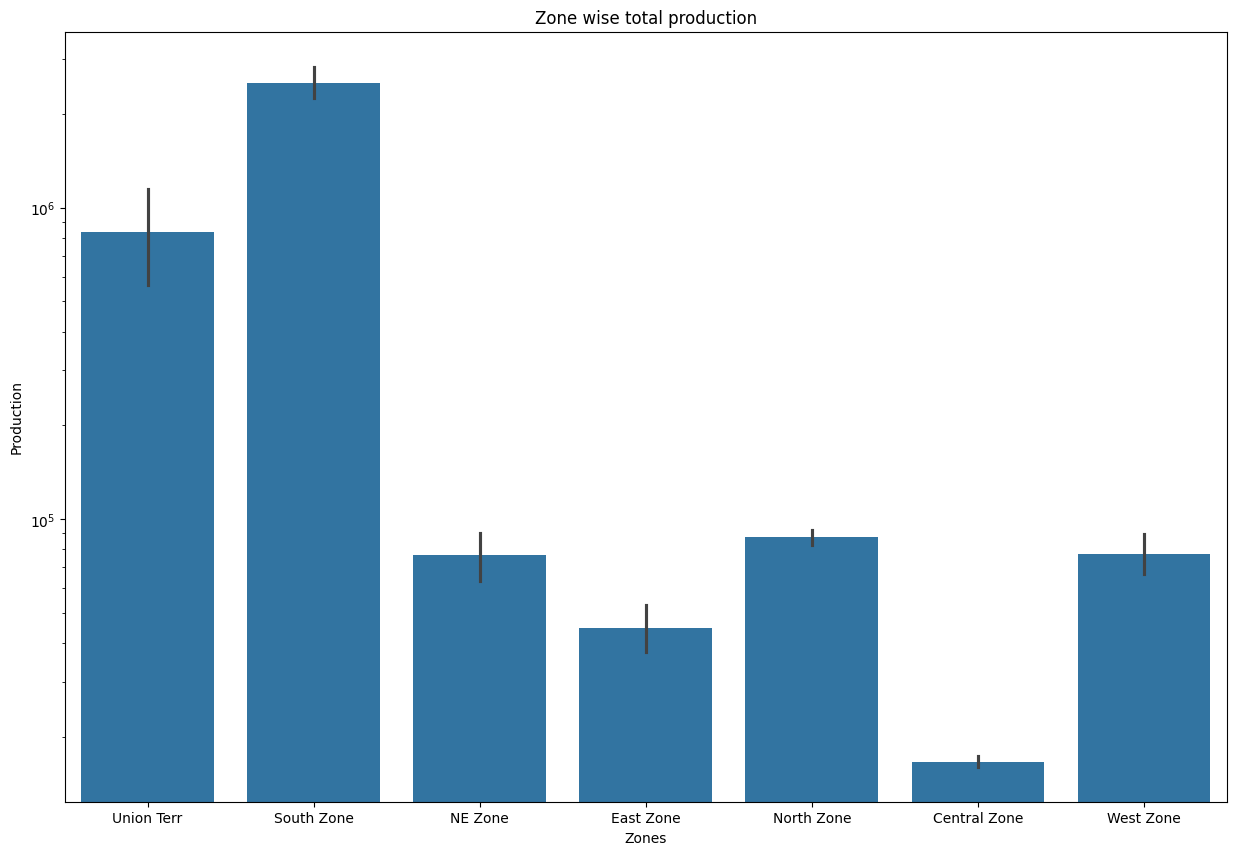

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=final_df.Zones.sort_values(ascending=False), y=final_df.Production)  # Specify x and y arguments
plt.yscale('log')
plt.title('Zone wise total production')

**Result**: South zone supplies the highest production followed by the union territories

**Analysing the state in south zone which produces the highest production**

<ipython-input-36-2f1d71c03dcc>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='State_Name', y='Production', data=south_zone, errwidth=0)


Text(0.5, 1.0, 'Southern-Zone wise Production')

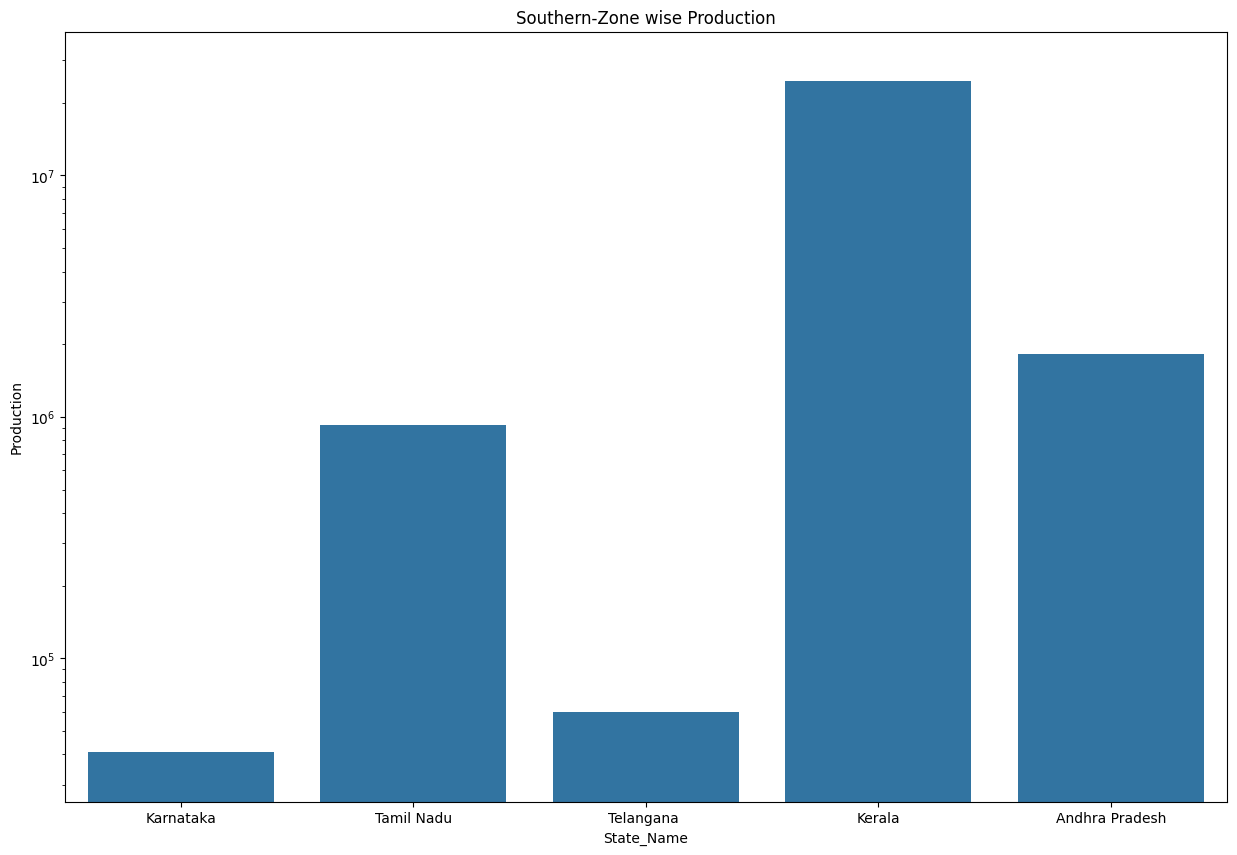

In [ ]:
south_zone =  final_df[(final_df["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
# Pass the entire DataFrame and specify x and y columns as keyword arguments
sns.barplot(x='State_Name', y='Production', data=south_zone, errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone wise Production')

**Result** : Kerala provides the highest production in south zone

**Analysing the district zone in kerala which gives the highest production**

<ipython-input-37-b8a673e0fccc>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='District_Name', y='Production', data=Kerala, errwidth=0)


Text(0.5, 1.0, 'Kerala district wise Production')

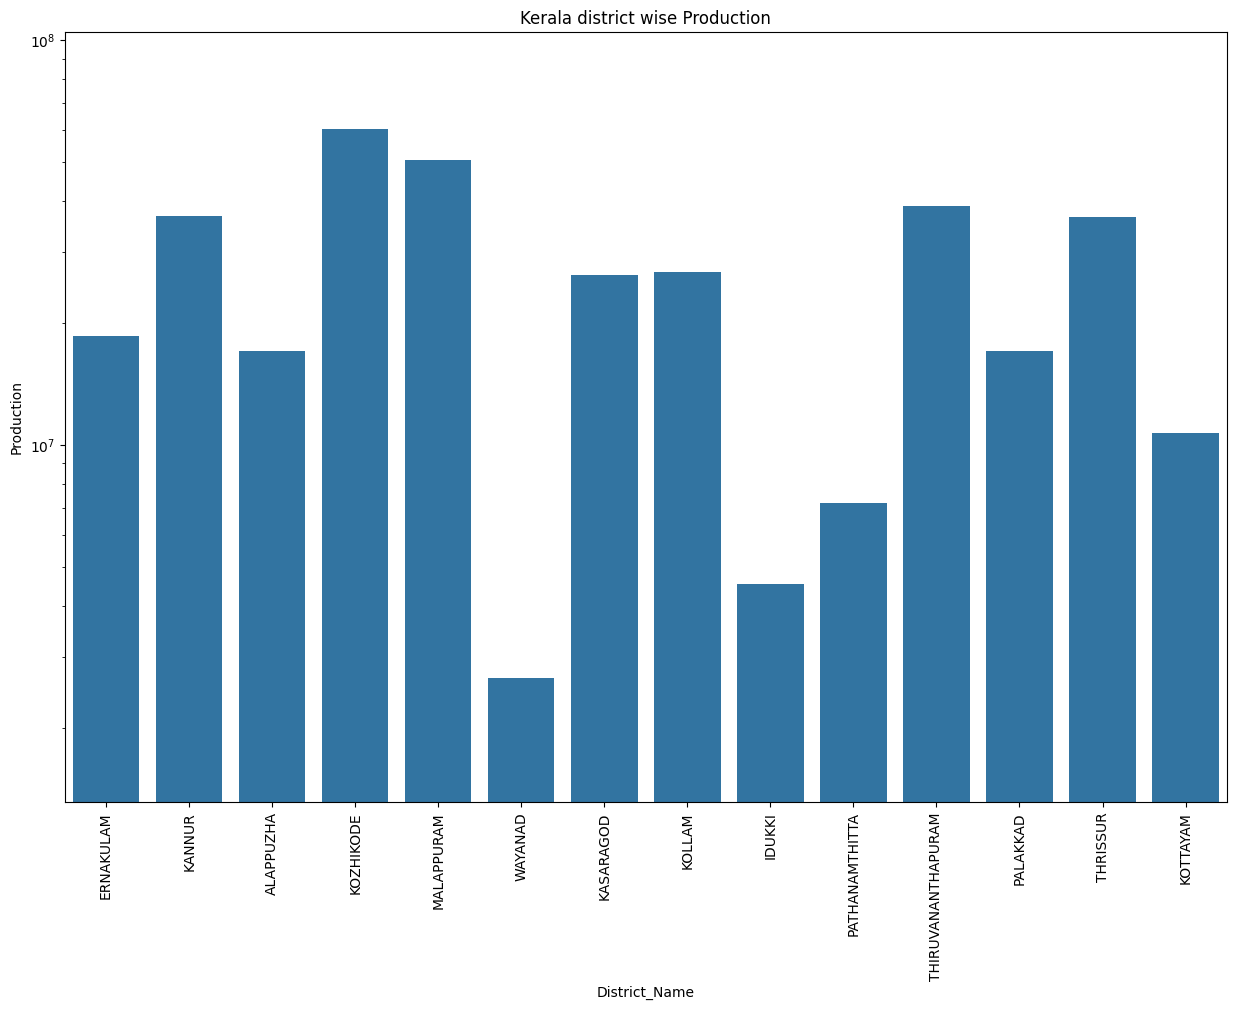

In [ ]:
Kerala =  final_df[(final_df["State_Name"] == 'Kerala')]
fig, ax = plt.subplots(figsize=(15,10))
# Pass x and y as keyword arguments
sns.barplot(x='District_Name', y='Production', data=Kerala, errwidth=0)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Kerala district wise Production')

**Result** : Kozhikode , Malappuram and Thiruvananthapuram gives the highest production in Kerala state

**Crop wise production**

Text(0.5, 1.0, 'Overall Crops vs Production')

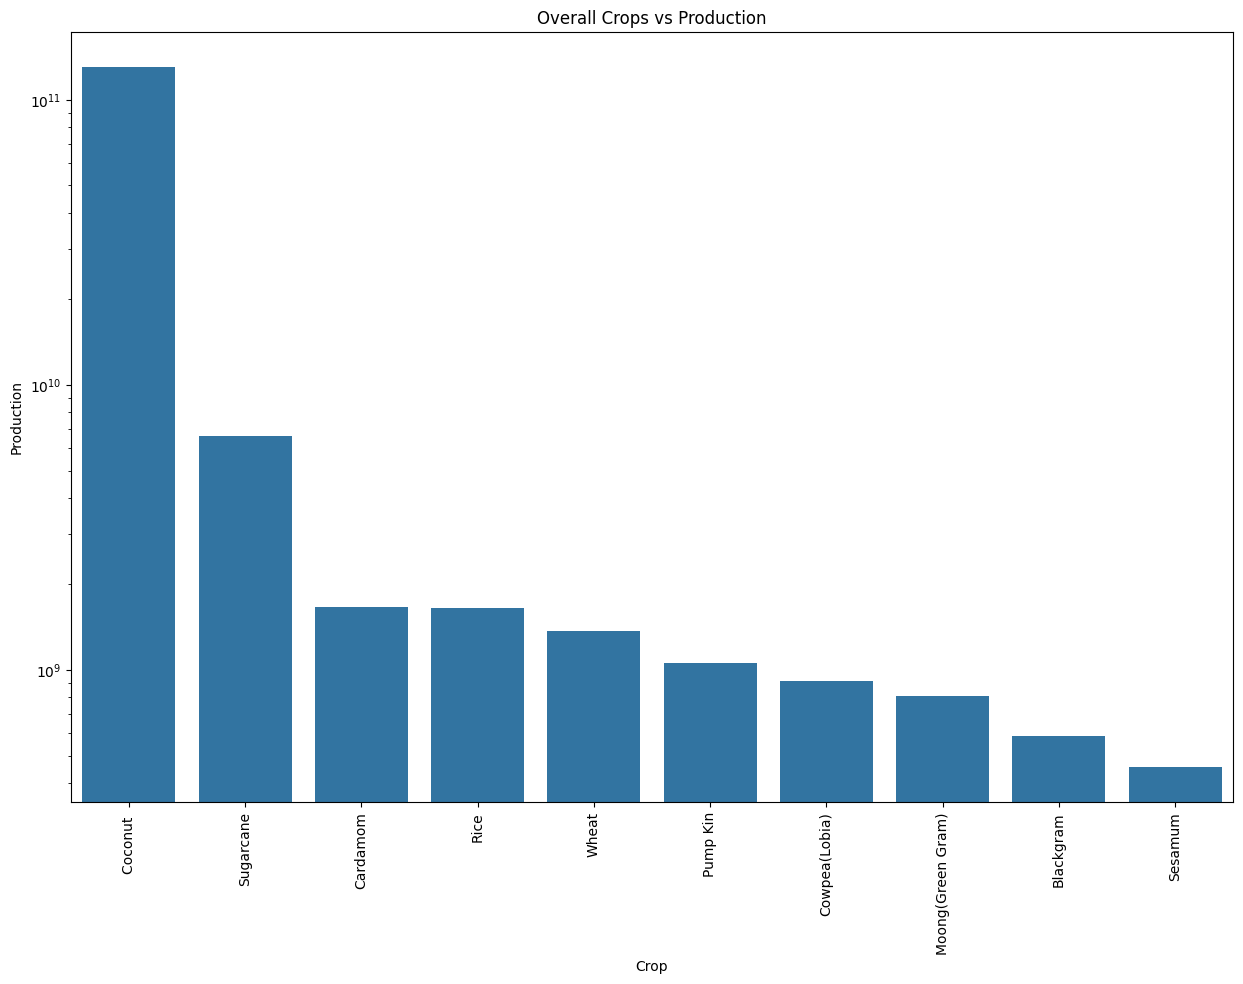

In [ ]:
crop = final_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop
fig, ax = plt.subplots(figsize=(15,10))
# Pass the DataFrame 'crop' and specify x and y columns as keyword arguments
sns.barplot(x='Crop', y='Production', data=crop) # Changed line
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Overall Crops vs Production')

**Result**: Coconut is the top production followed by Sugar crane and Cardamom

**Season wise productions**

<ipython-input-39-b806450eeec1>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='Season', y='Production', data=season, errwidth=0) # Changed line


Text(0.5, 1.0, 'Seasonal Crops vs Production')

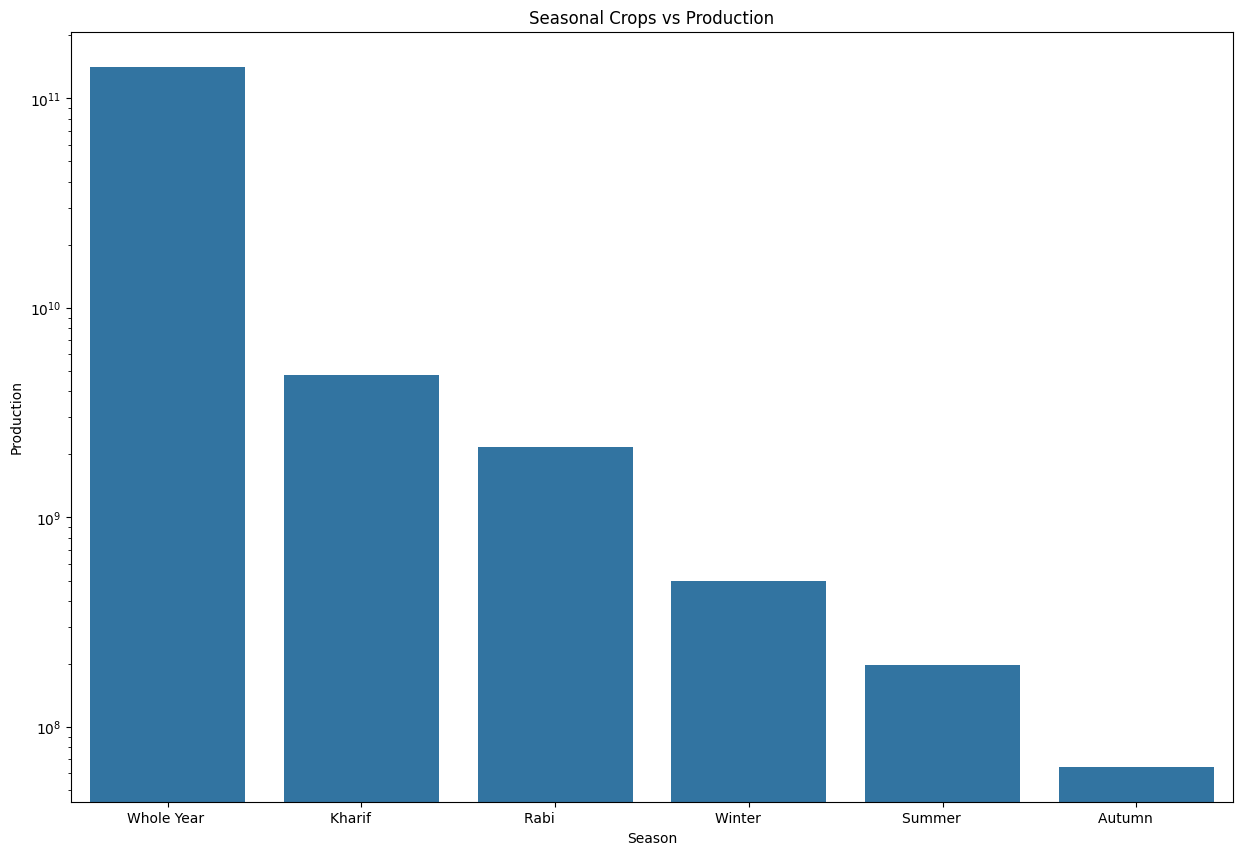

In [ ]:
season = final_df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
# Pass the DataFrame 'season' and specify x and y columns as keyword arguments
sns.barplot(x='Season', y='Production', data=season, errwidth=0) # Changed line
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

**Result**: More productions can be witnessed in WHOLE YEAR followed by Kharif and Rabi.

**Year vs Production Analysis**

<Axes: xlabel='Crop_Year'>

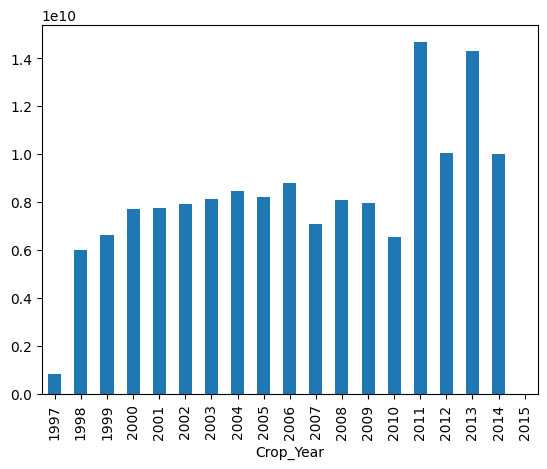

In [ ]:
plt.tick_params(labelsize=10)
final_df.groupby('Crop_Year')['Production'].agg('sum').plot.bar()

**Result**: More productions was witnessed in 2011 followed by 2013.

**Crop categories vs Production**

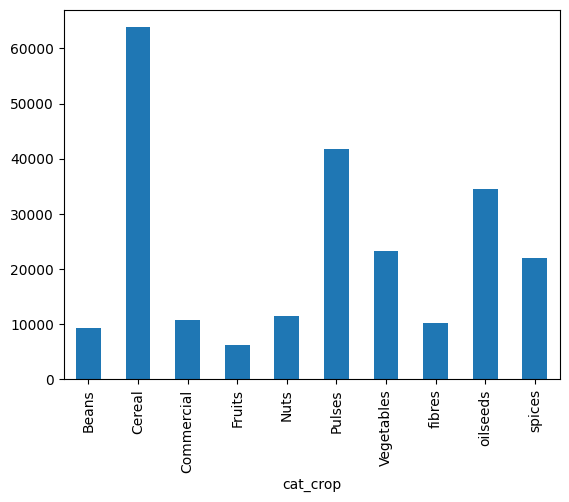

In [ ]:
final_df.groupby('cat_crop')['Production'].agg("count").plot.bar()
plt.tick_params(labelsize=10)

**Result**: Cereals has the highest production followed by pulses and oilseeds

**Season vs Crop categories vs State**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


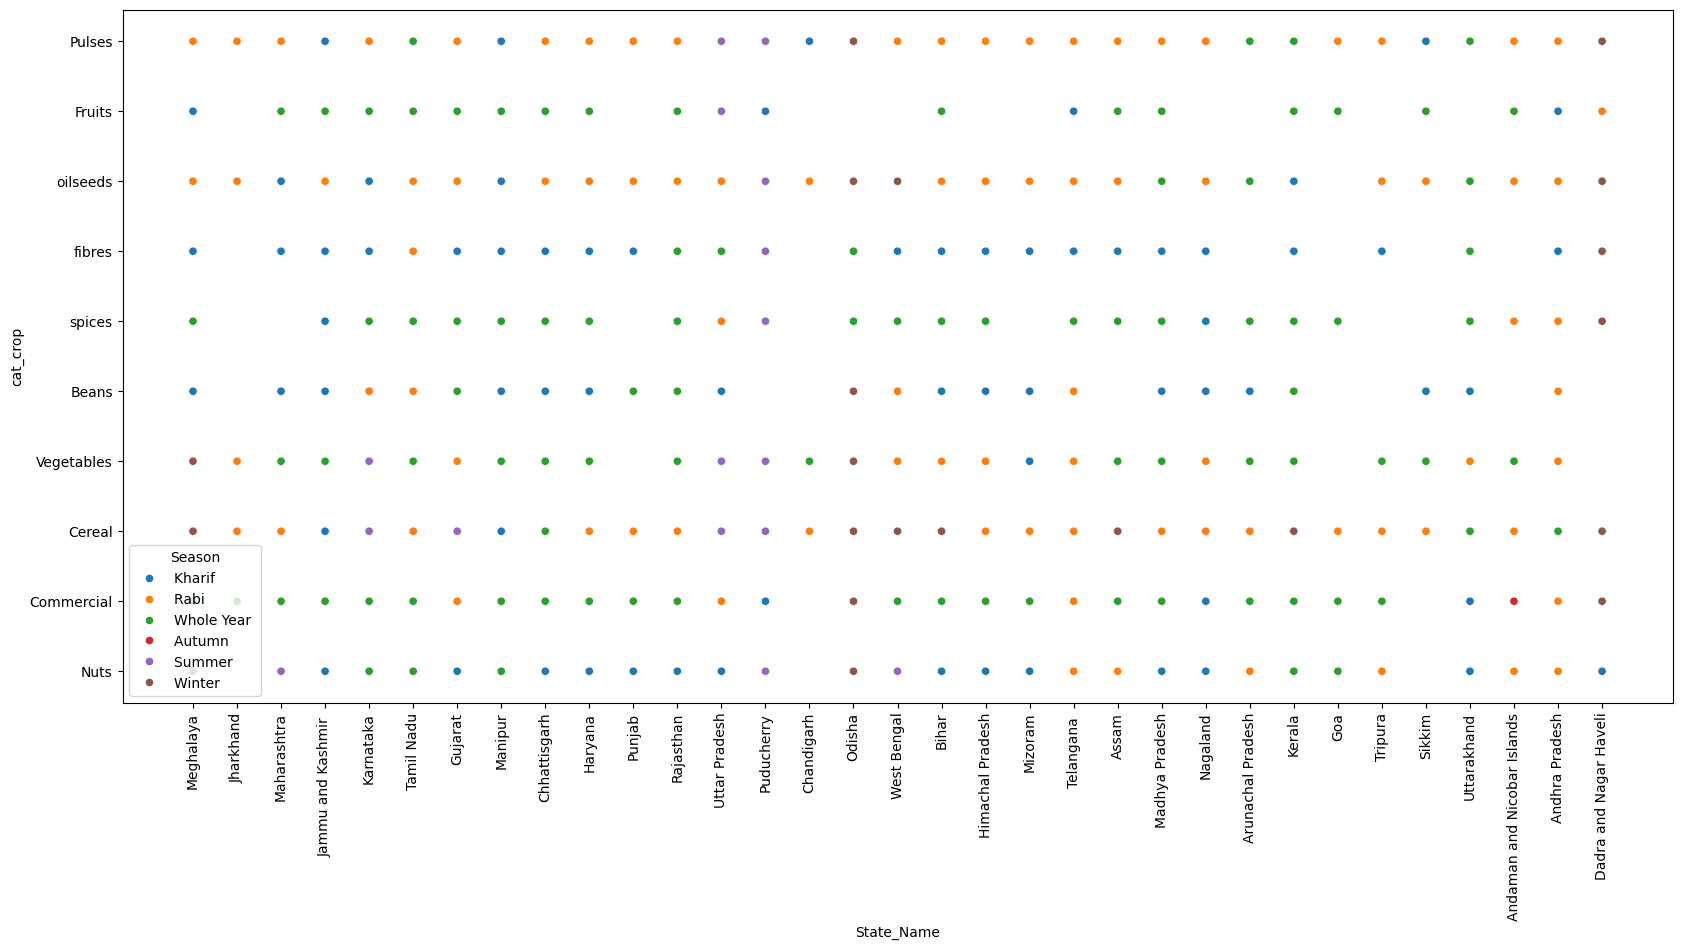

In [ ]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.scatterplot(data = final_df , x="State_Name", y="cat_crop", hue='Season')
plt.show()

**Result**: Top agriculture rich state like Uttar pradesh produce abundance of Kharif crops , Kerala produces abundance of whole year crops

**Percentage of crop categories**

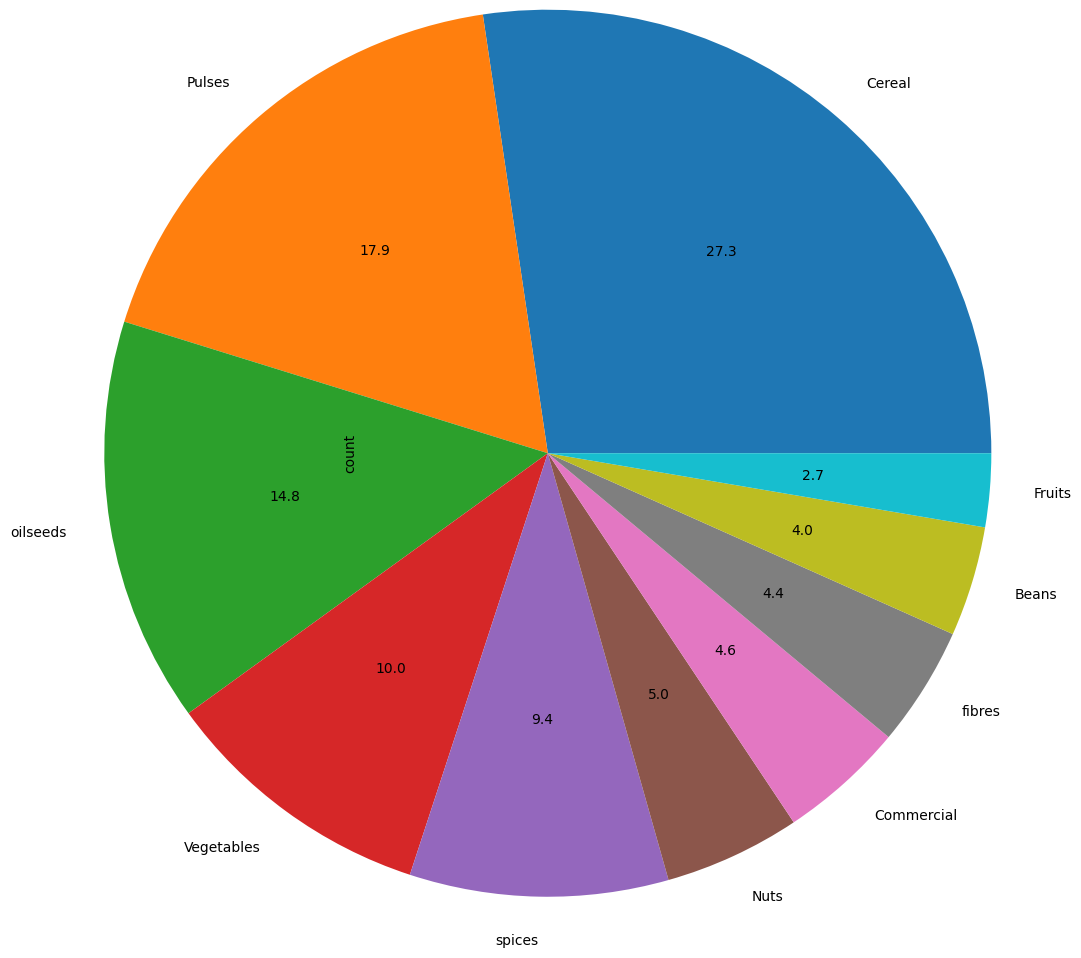

In [ ]:
cat_crop_count_df=final_df["cat_crop"].value_counts()
cat_crop_count_df.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

**Result**: Cereals production was greater followed by Pulses and oilseeds

# **Key Indicators and obtaining useful insights**

**State that dominates in crop production by producing a variety of crop categories**

<Axes: xlabel='State_Name'>

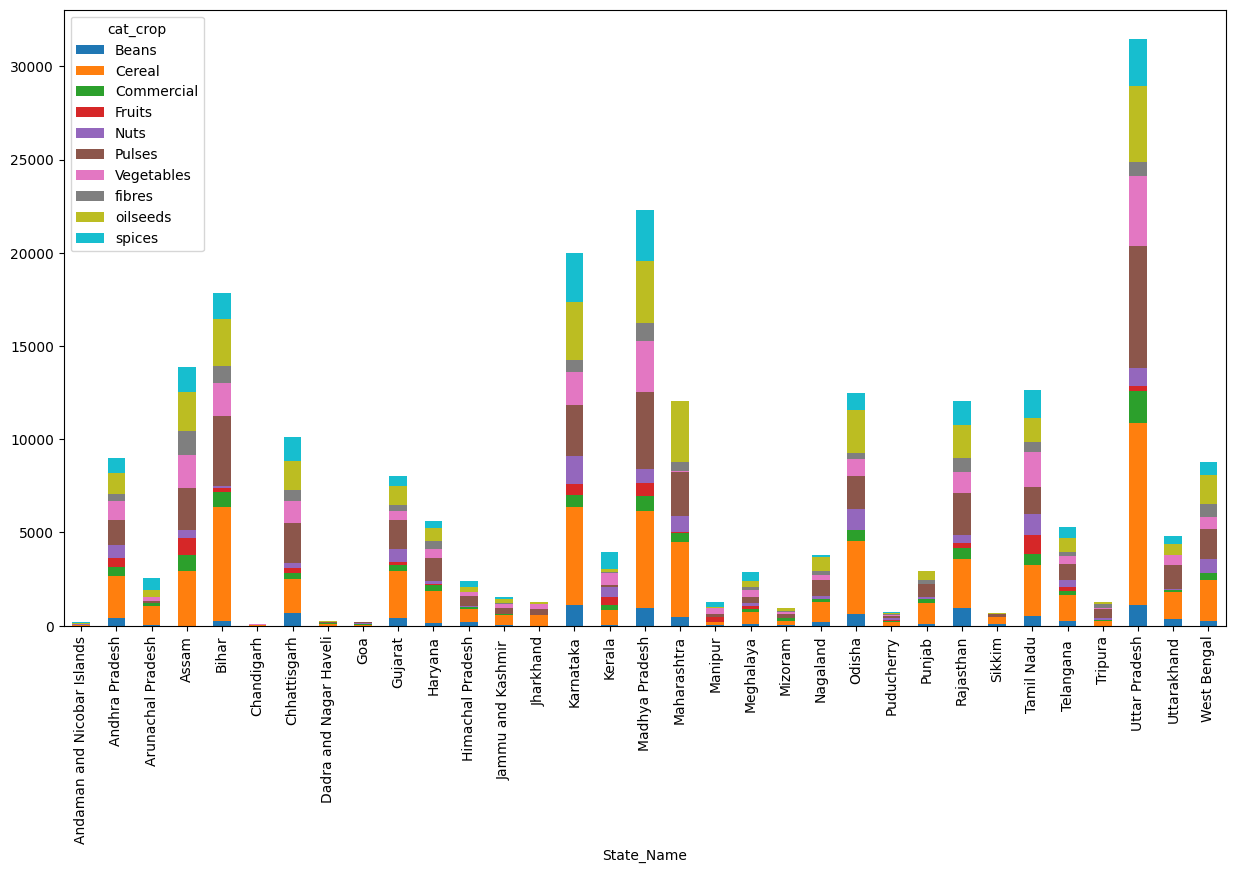

In [ ]:
state_cat_crop= pd.crosstab(final_df['State_Name'],final_df['cat_crop'])
state_cat_crop.plot(kind="bar",stacked=True,figsize=(15,8))

**Result** : Uttar Pradhesh produces a various of crop categories and dominates in high production rank followed by Madhya pradesh and Karnataka

**Which crop is grown in high frequency in India? Provide useful insights for the same**

In [ ]:
final_df['Crop'].value_counts()[:5]

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Name: count, dtype: int64

In [ ]:
rice_df=final_df[final_df['Crop']=="Rice"]
print(rice_df.shape)
rice_df.head(4)

(15104, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
140220,Meghalaya,NORTH GARO HILLS,2014,Autumn,Rice,4993.00,12110.00,NE Zone,Cereal
140249,Meghalaya,NORTH GARO HILLS,2014,Winter,Rice,3687.00,7766.00,NE Zone,Cereal
76338,Jharkhand,LATEHAR,2003,Autumn,Rice,12998.57,3812.91,East Zone,Cereal
76346,Jharkhand,LATEHAR,2003,Winter,Rice,17100.47,1149.51,East Zone,Cereal


<Axes: xlabel='Season', ylabel='Production'>

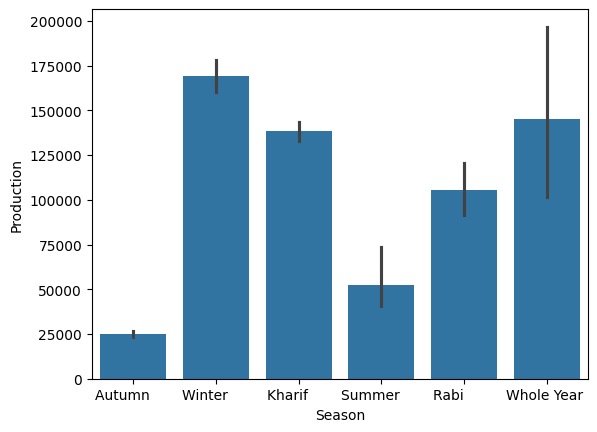

In [ ]:
import seaborn as sns # Make sure Seaborn is imported
sns.barplot(x="Season", y="Production", data=rice_df) # Use named arguments for clarity

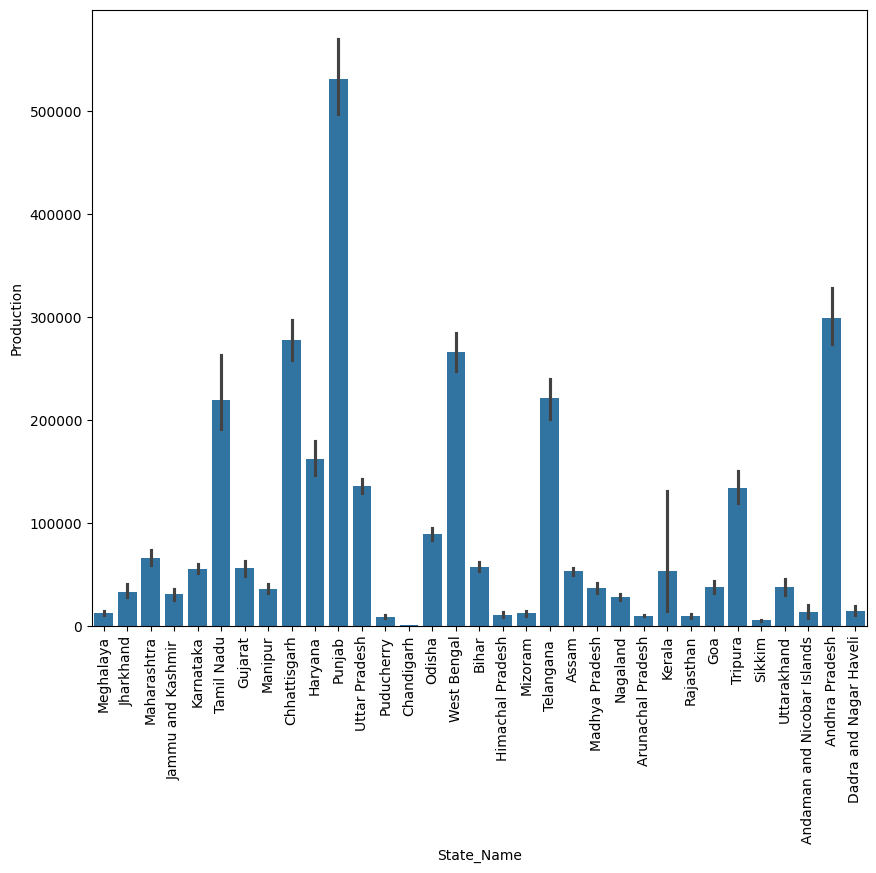

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="State_Name", y="Production", data=rice_df) # Use named arguments for x and y
plt.xticks(rotation=90)
plt.show() # Call the show function

In [ ]:
top_rice_dist = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
top_rice_dist.head(5)

,District_Name,Production
58,BARDHAMAN,3.423998e+07
375,MEDINIPUR WEST,2.919272e+07
613,WEST GODAVARI,2.784531e+07
316,KOLLAM,2.695188e+07
169,EAST GODAVARI,2.469093e+07


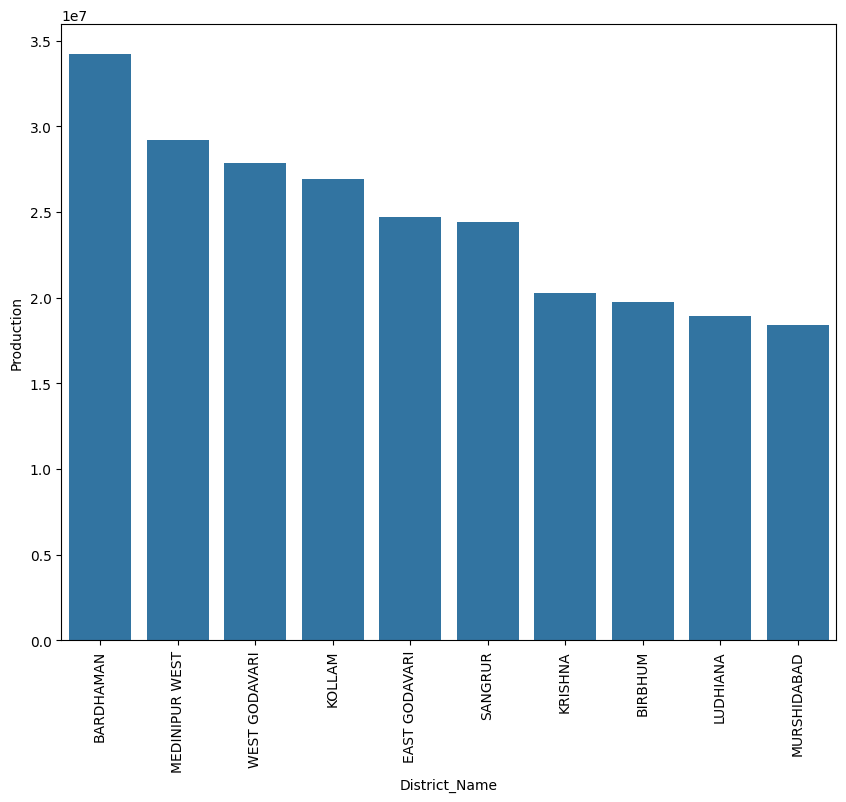

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="District_Name", y="Production", data=top_rice_dist[:10]) # Use named arguments for x and y
plt.xticks(rotation=90)
plt.show() # Call the show function

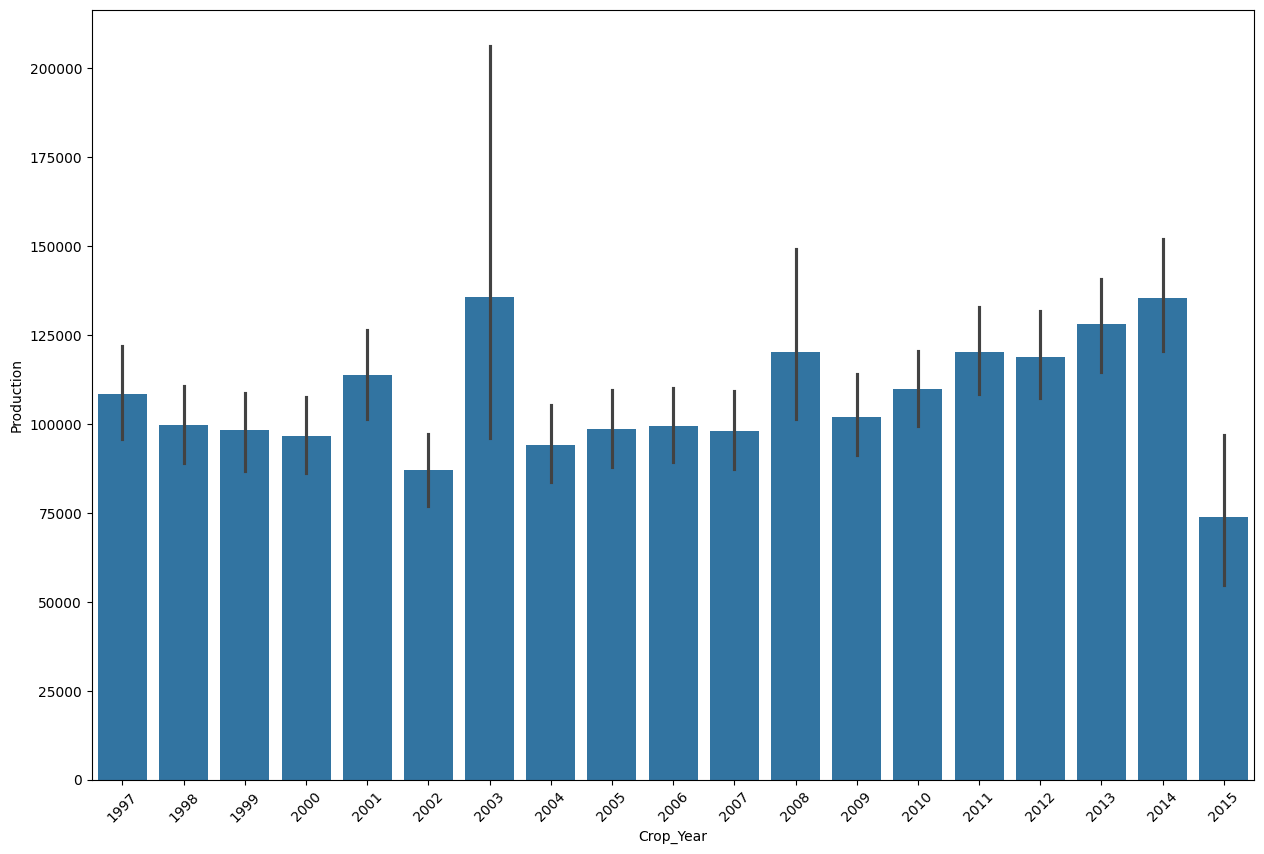

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year", y="Production", data=rice_df) # Use named arguments for x and y
plt.xticks(rotation=45)
plt.show()

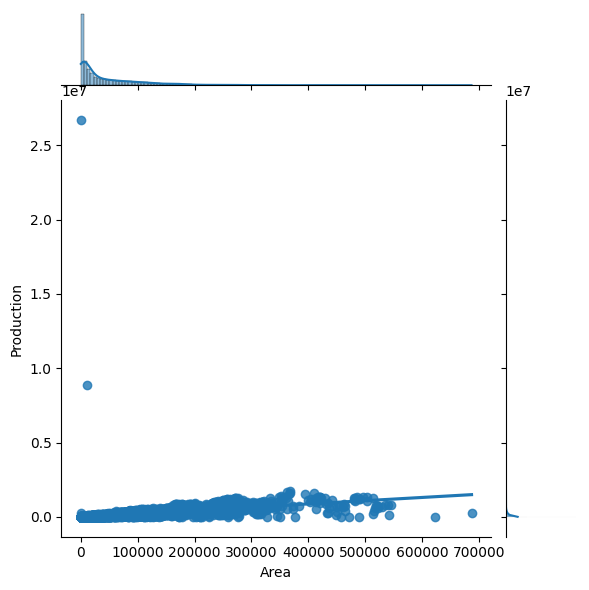

In [ ]:
sns.jointplot(x="Area", y="Production", data=rice_df, kind="reg")

**Result**:

1. Rice is the most frequent crop in India.

2. Rice is produced in high is Winter season followed by Whole year and Kharif

3. Punjab is richest state for high rice production.

4. Bardaman district in Punjab is rich for rice production

**State that ranks high in area wise crop production in India**

In [ ]:
df_area=final_df.groupby("State_Name")["Area"].sum().reset_index().sort_values(by="Area",ascending=False)
df_area.head()

,State_Name,Area
30,Uttar Pradesh,4.336316e+08
16,Madhya Pradesh,3.298131e+08
17,Maharashtra,3.222062e+08
25,Rajasthan,2.720249e+08
32,West Bengal,2.154052e+08


<ipython-input-54-18fbfe9fa4e2>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x='State_Name', y='Area', data=df_area.head(10), errwidth=0) # Pass the entire DataFrame subset and specify x and y columns


Text(0.5, 1.0, 'Indian Agricultural Area Distribution')

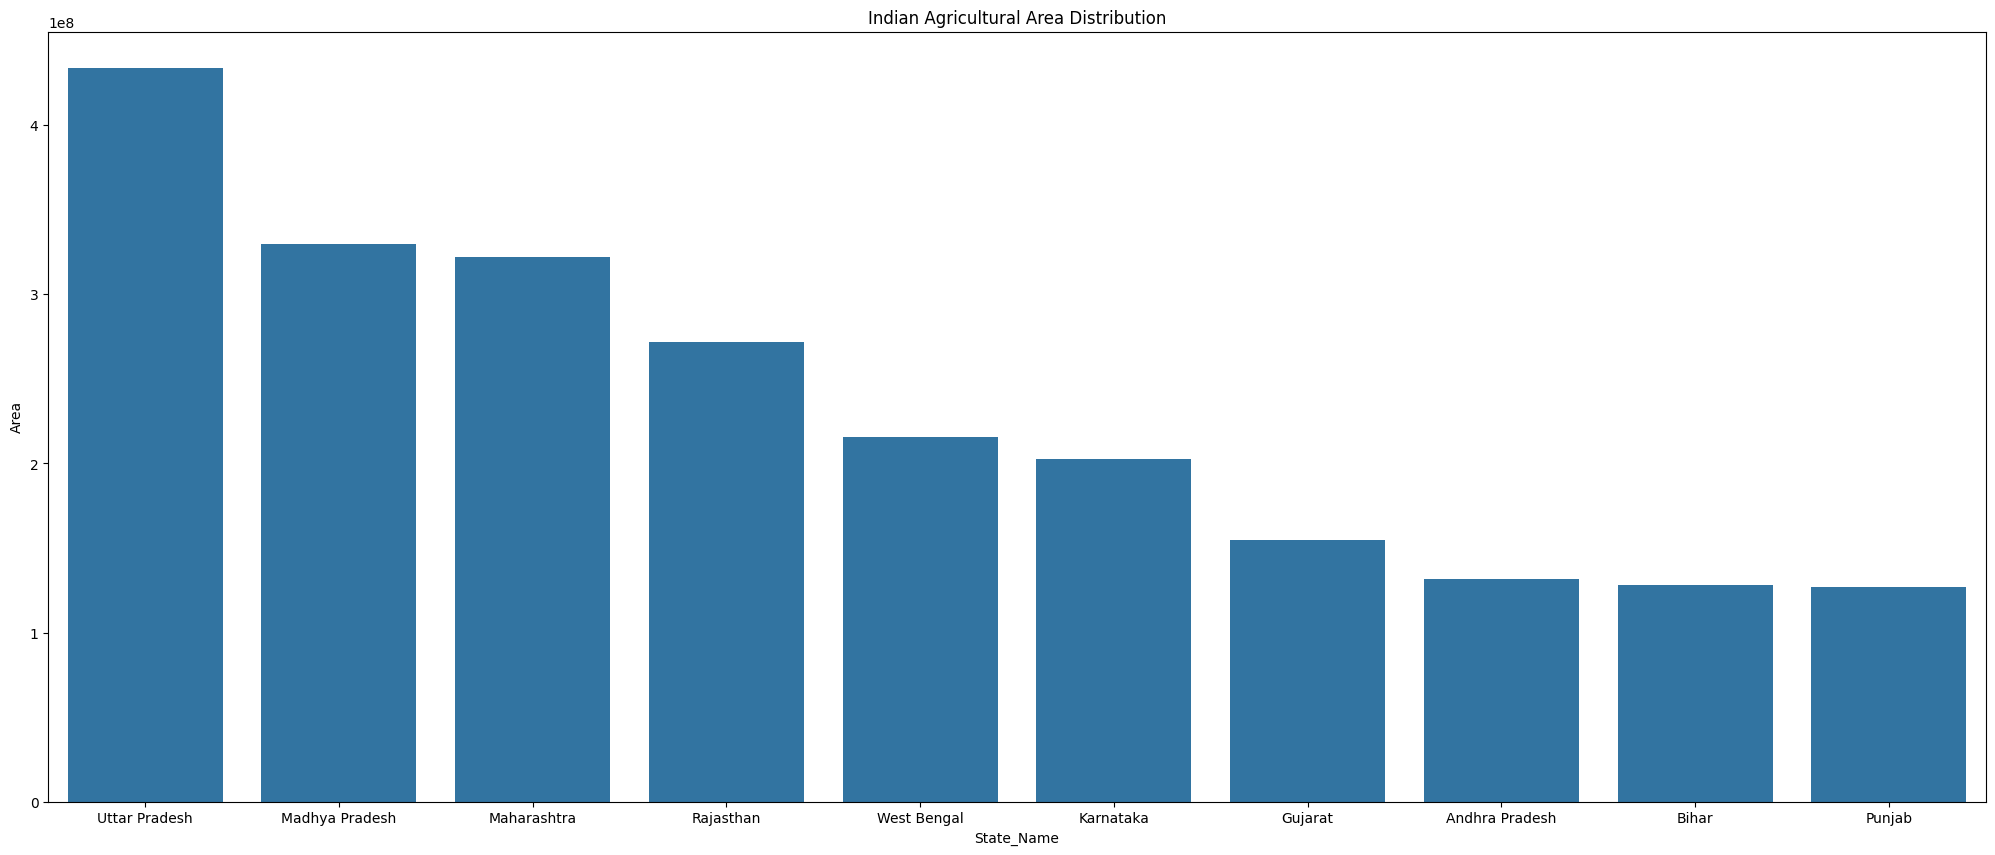

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x='State_Name', y='Area', data=df_area.head(10), errwidth=0) # Pass the entire DataFrame subset and specify x and y columns
plt.title('Indian Agricultural Area Distribution')

**Result**: Top crop producing states based on Area are Uttar Pradhesh followed by Madhya Pradhesh and Maharashtra

**Top Crops produced in Northern parts of State**

In [ ]:
North_Zone=final_df[final_df["Zones"]=="North Zone"]
print(North_Zone.shape)

(51468, 9)


In [ ]:
North_Zone.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
74057,Jammu and Kashmir,BADGAM,1997,Kharif,Maize,12876.0,6800.0,North Zone,Cereal
74058,Jammu and Kashmir,BADGAM,1997,Kharif,Rice,27897.0,626.0,North Zone,Cereal
74059,Jammu and Kashmir,BADGAM,1997,Rabi,Wheat,645.0,580.0,North Zone,Cereal
74060,Jammu and Kashmir,BADGAM,1999,Kharif,Cond-spcs other,143.0,106.0,North Zone,spices
74061,Jammu and Kashmir,BADGAM,1999,Kharif,Maize,14164.0,7030.0,North Zone,Cereal


,State_Name,Production
5,Uttar Pradesh,3.248159e+09
4,Punjab,5.905425e+08
1,Haryana,4.930824e+08
6,Uttarakhand,1.344728e+08
2,Himachal Pradesh,1.823680e+07
3,Jammu and Kashmir,1.331539e+07
0,Chandigarh,6.467511e+04


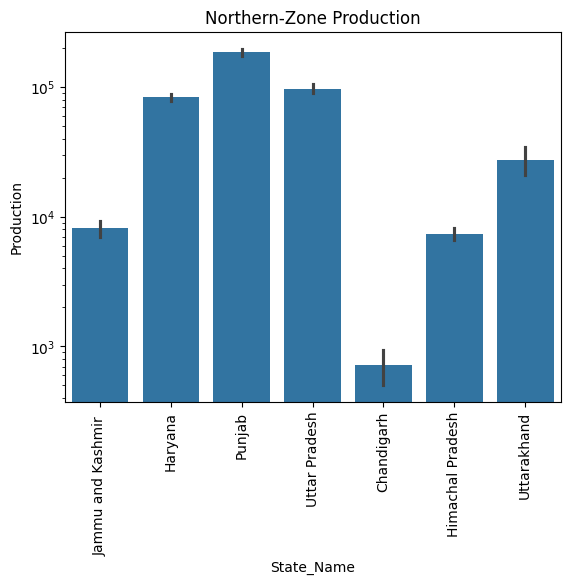

In [ ]:
sns.barplot(x='State_Name', y='Production', data=North_Zone)
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Northern-Zone Production')

North_Zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

Text(0.5, 1.0, 'Crop vs Production in Northern-Zone')

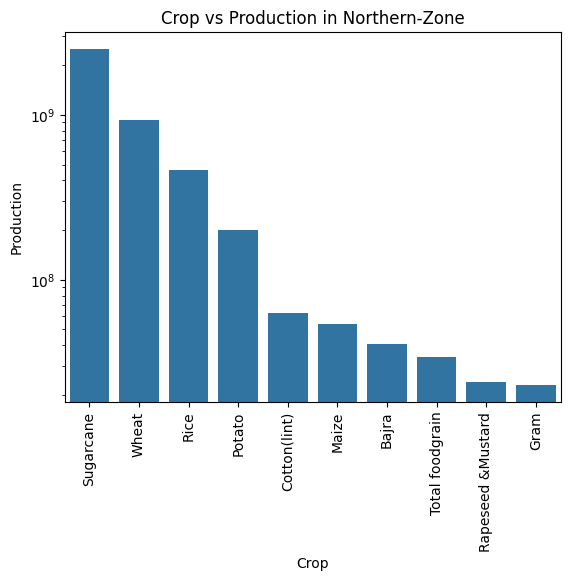

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_NZ= North_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(x='Crop', y='Production', data=df_NZ) # Pass the entire DataFrame as 'data' and specify 'x' and 'y'
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Crop vs Production in Northern-Zone')

**Result**:

1. Top crop producing states in North parts are Punjab followed by Uttar pradhesh

2. Top crops produced in Northern zone are Sugar cane followed by Wheat.

**Top crop produced in Southern Zone**

In [ ]:
South_Zone=final_df[final_df["Zones"]=="South Zone"]
print(South_Zone.shape)

(54207, 9)


In [ ]:
South_Zone.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
83200,Karnataka,CHIKBALLAPUR,2007,Kharif,Arhar/Tur,7021.0,3001.0,South Zone,Pulses
83201,Karnataka,CHIKBALLAPUR,2007,Kharif,Castor seed,582.0,390.0,South Zone,oilseeds
83202,Karnataka,CHIKBALLAPUR,2007,Kharif,Dry chillies,452.0,407.0,South Zone,spices
83203,Karnataka,CHIKBALLAPUR,2007,Kharif,Groundnut,40607.0,37352.0,South Zone,Nuts
83204,Karnataka,CHIKBALLAPUR,2007,Kharif,Horse-gram,320.0,163.0,South Zone,Beans
83205,Karnataka,CHIKBALLAPUR,2007,Kharif,Maize,32608.0,57155.0,South Zone,Cereal
83206,Karnataka,CHIKBALLAPUR,2007,Kharif,Niger seed,608.0,229.0,South Zone,oilseeds
83207,Karnataka,CHIKBALLAPUR,2007,Kharif,Onion,277.0,1651.0,South Zone,Vegetables
83208,Karnataka,CHIKBALLAPUR,2007,Kharif,Other Kharif pulses,4854.0,2901.0,South Zone,Pulses
83209,Karnataka,CHIKBALLAPUR,2007,Kharif,Potato,348.0,1148.0,South Zone,Vegetables


Text(0.5, 1.0, 'Crop vs Production in Southern-Zone')

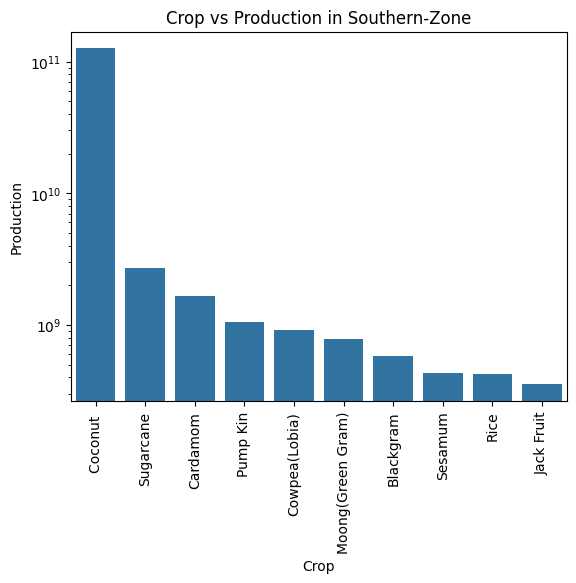

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_SZ= South_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(x='Crop', y='Production', data=df_SZ) # Pass the DataFrame and column names
plt.xticks(rotation=90);
plt.yscale('log')
plt.title('Crop vs Production in Southern-Zone')

In [ ]:
df_coco = final_df[final_df["Crop"]=="Coconut "]
print(df_coco.shape)
df_coco[:5]

(1985, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
83231,Karnataka,CHIKBALLAPUR,2007,Whole Year,Coconut,630.0,3208.0,South Zone,None
83263,Karnataka,CHIKBALLAPUR,2008,Whole Year,Coconut,699.0,4789.0,South Zone,None
83299,Karnataka,CHIKBALLAPUR,2009,Whole Year,Coconut,821.0,5837.0,South Zone,None
83345,Karnataka,CHIKBALLAPUR,2010,Whole Year,Coconut,1203.0,11500.0,South Zone,None
83393,Karnataka,CHIKBALLAPUR,2011,Whole Year,Coconut,3192.0,31734.0,South Zone,None


<Axes: xlabel='Season', ylabel='Production'>

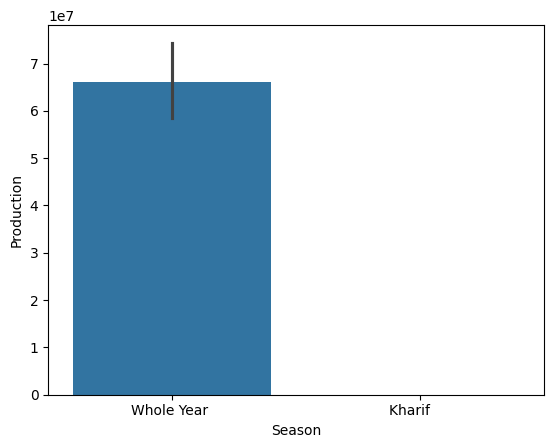

In [ ]:
sns.barplot(x="Season",y="Production",data=df_coco)

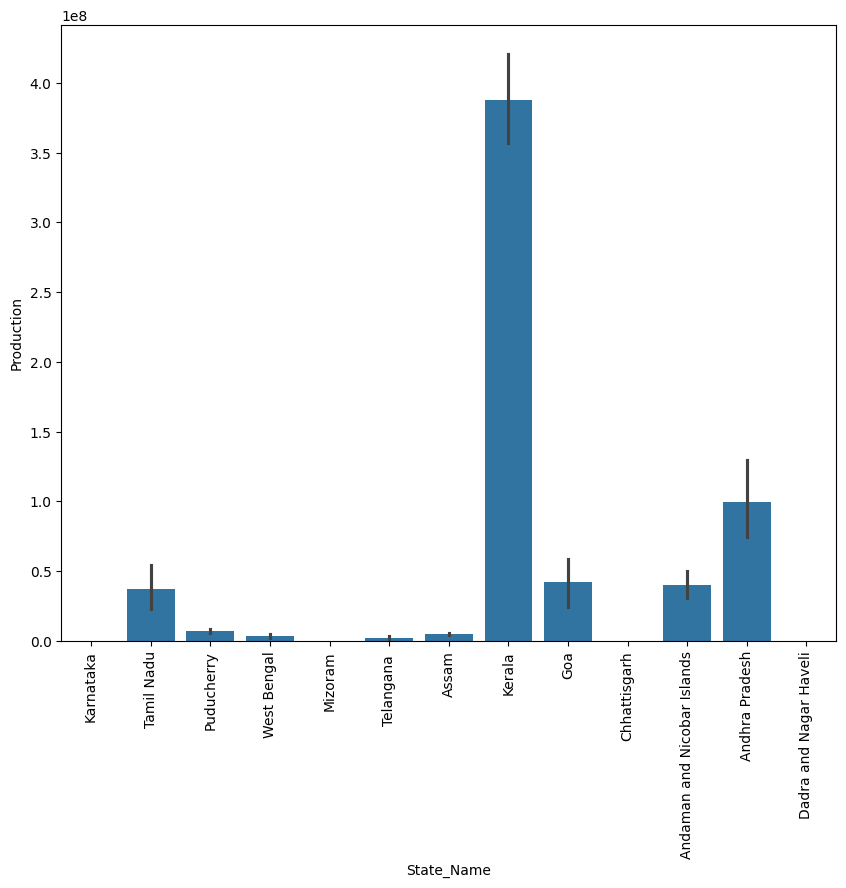

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="State_Name",y="Production",data=df_coco)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_coco_dist = df_coco.groupby("District_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
top_coco_dist.head(5)

,District_Name,Production
80,KOZHIKODE,1.527871e+10
89,MALAPPURAM,1.451252e+10
134,THIRUVANANTHAPURAM,1.001337e+10
136,THRISSUR,9.920739e+09
66,KANNUR,9.780310e+09


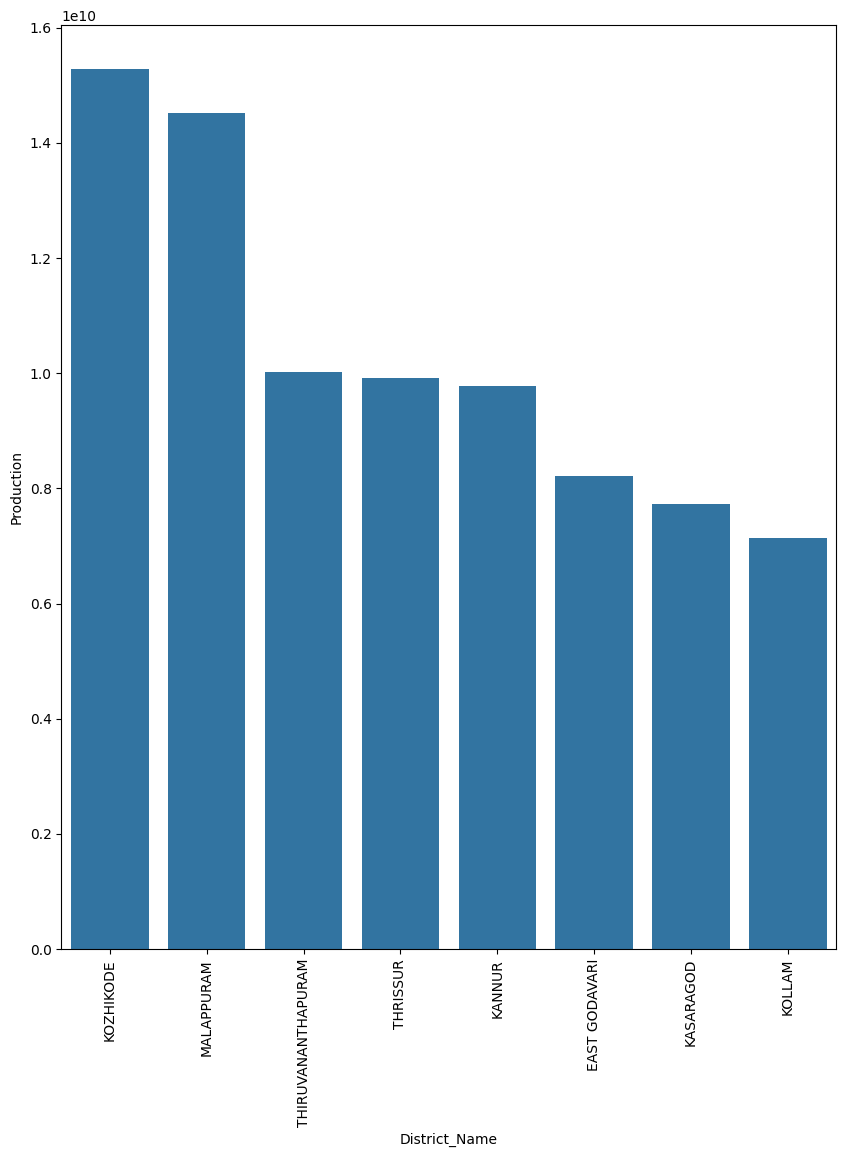

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x="District_Name",y="Production",data=top_coco_dist[:8])
plt.xticks(rotation=90)
plt.show()

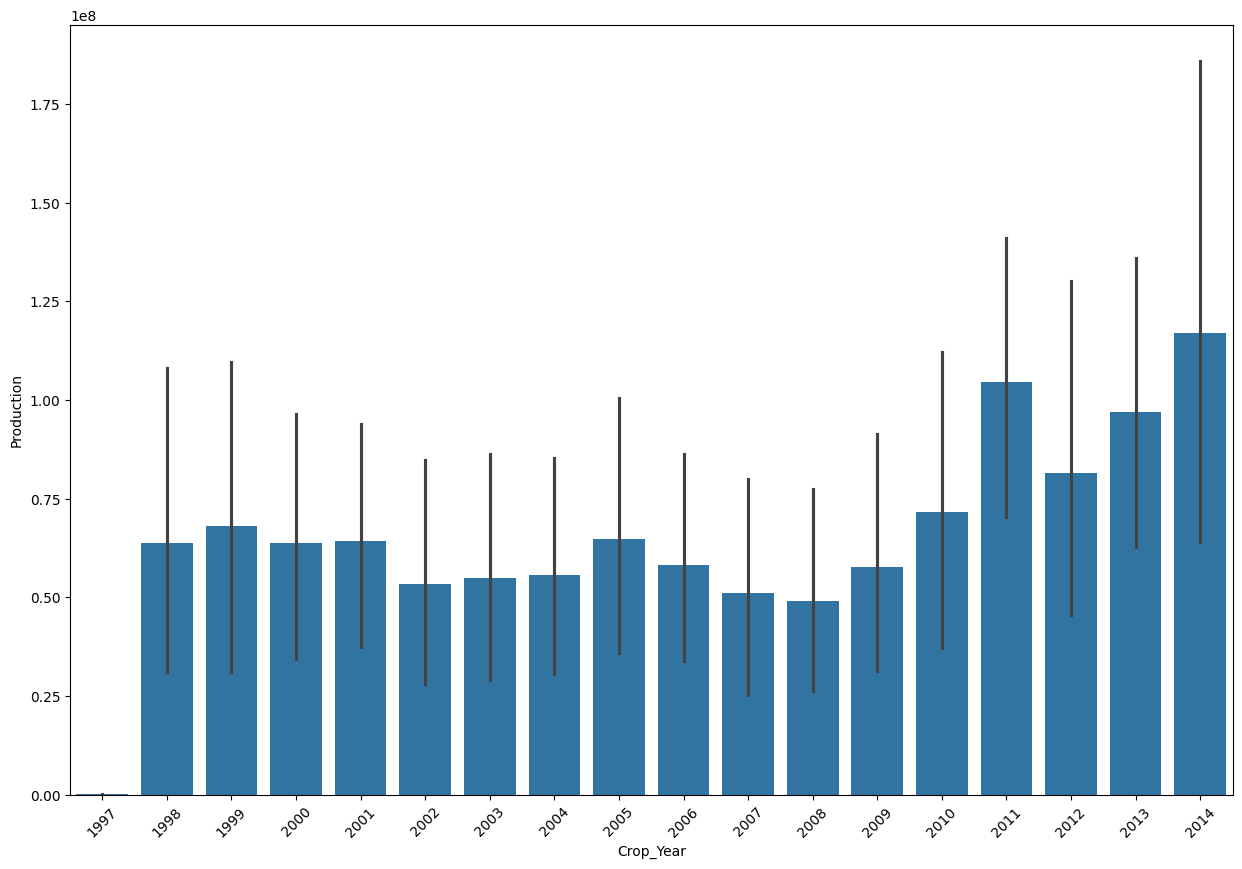

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=df_coco)
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x1000 with 0 Axes>

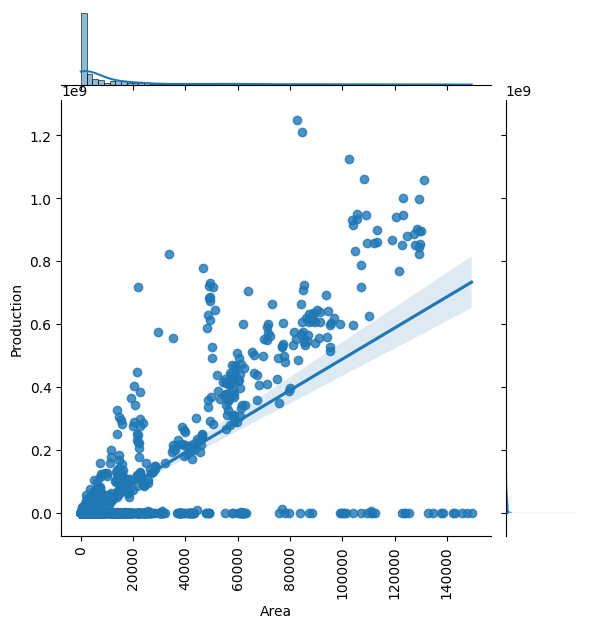

In [ ]:
plt.figure(figsize=(15,10))
sns.jointplot(x="Area",y="Production",data=df_coco,kind="reg")
plt.xticks(rotation=90)
plt.show()

**Result**:

1. Top crop grown in Southern Zone is coconut.

2. The coconut gets matured in Whole year season

3. Kerala state in southern zone yeilds a high amount of Coconut

4. Kozhikode and Malapuram districts of Kerala are rich in Coconut production

5. Coconut production was yeilded more during 2011 and 2014.

6. High coconut cultivation is directly proportional to area under cultivation.

**Top crop produced in Central state**

In [ ]:
Central_Zone=final_df[final_df["Zones"]=="Central Zone"]
print(Central_Zone.shape)

(33652, 9)


In [ ]:
Central_Zone.head(8)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
53152,Chhattisgarh,MAHASAMUND,2000,Kharif,Arhar/Tur,888.0,307.0,Central Zone,Pulses
53153,Chhattisgarh,MAHASAMUND,2000,Kharif,Groundnut,7360.0,7687.0,Central Zone,Nuts
53154,Chhattisgarh,MAHASAMUND,2000,Kharif,Horse-gram,122.0,30.0,Central Zone,Beans
53155,Chhattisgarh,MAHASAMUND,2000,Kharif,Jowar,66.0,53.0,Central Zone,Cereal
53156,Chhattisgarh,MAHASAMUND,2000,Kharif,Maize,136.0,149.0,Central Zone,Cereal
53157,Chhattisgarh,MAHASAMUND,2000,Kharif,Mesta,17.0,35.0,Central Zone,fibres
53158,Chhattisgarh,MAHASAMUND,2000,Kharif,Moong(Green Gram),3123.0,879.0,Central Zone,None
53159,Chhattisgarh,MAHASAMUND,2000,Kharif,Niger seed,6.0,1.0,Central Zone,oilseeds


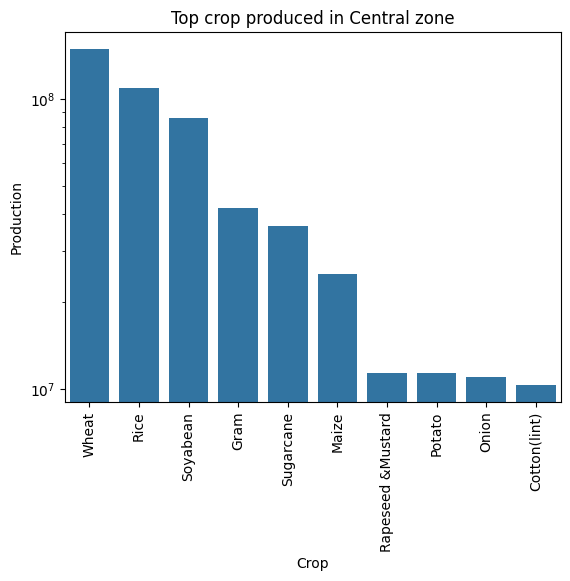

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_central_crop = Central_Zone.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
# Pass the entire DataFrame to the 'data' parameter, and specify 'x' and 'y' columns
sns.barplot(data=df_central_crop, x="Crop", y="Production")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Top crop produced in Central zone")
plt.show()

,State_Name,Production
1,Madhya Pradesh,4.555427e+08
0,Chhattisgarh,1.055266e+08


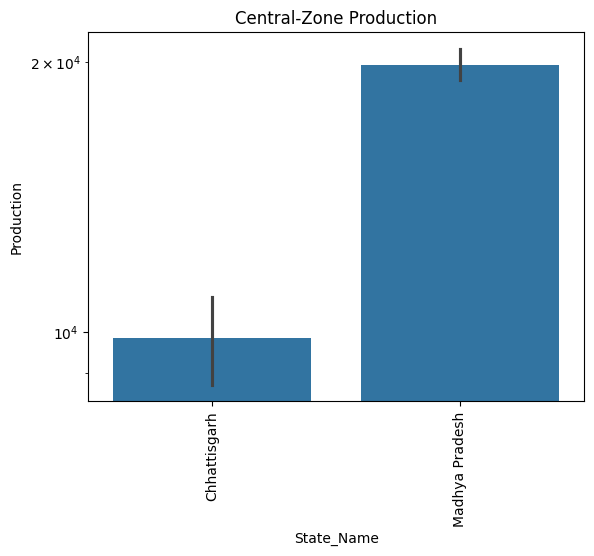

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the 'x' and 'y' parameters to specify columns within the DataFrame
sns.barplot(data=Central_Zone, x='State_Name', y='Production')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Central-Zone Production')

Central_Zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

**Result**:

1. Wheat is the top crop produced in Central Zone

2. State rich in Wheat production is Madhya Pradesh

**Crop categories and their Production rate**

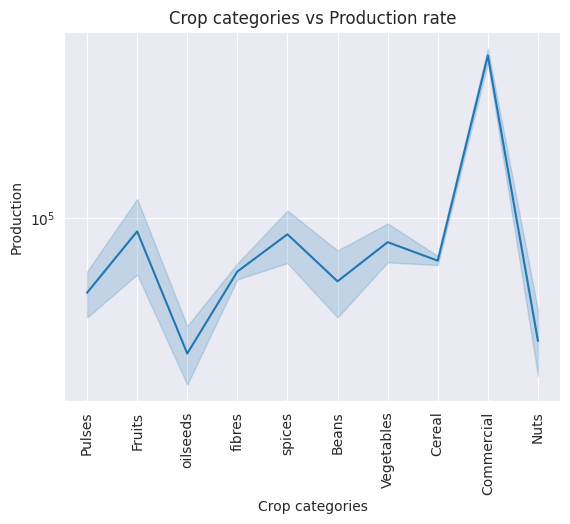

,cat_crop,Production
2,Commercial,6.612507e+09
1,Cereal,3.944948e+09
9,spices,1.827835e+09
5,Pulses,1.799547e+09
6,Vegetables,1.775118e+09
8,oilseeds,7.527392e+08
7,fibres,5.581822e+08
3,Fruits,5.360099e+08
0,Beans,4.590149e+08
4,Nuts,2.913803e+08


In [ ]:
sns.set_style('darkgrid')
sns.lineplot(data=final_df, x='cat_crop', y='Production')

plt.title('Crop categories vs Production rate')
plt.xlabel('Crop categories')
plt.ylabel('Production')
plt.xticks(rotation=90);
plt.yscale('log')

plt.show()

final_df.groupby(by='cat_crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

**Result**: Commercial crops like Tobacco , Coffee , Tea , Rubber and Sugar cane has given the largest production